# Is Ms Dhoni still good enough to bat?

In [1]:
# Step:1 Analyse the past three years of dhoni's data
# Step:2 Visualization
# Step:3 Comparision between other finishers of TATA IPL 2023

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', None)
pd.set_option('max_colwidth', -1)

In [3]:
df = pd.read_csv('IPL_ball_by_ball_data.csv')
df.head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(df), len(df.columns)

(225954, 22)

In [5]:
df.innings.unique()


array([1, 2, 3, 4, 5, 6], dtype=int64)

In [6]:
df = df[(df.innings == 1) | (df.innings == 2)]


In [7]:
df.innings.unique()

array([1, 2], dtype=int64)

In [8]:
df.dtypes

match_id                  int64  
season                    object 
start_date                object 
venue                     object 
innings                   int64  
ball                      float64
batting_team              object 
bowling_team              object 
striker                   object 
non_striker               object 
bowler                    object 
runs_off_bat              int64  
extras                    int64  
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type               object 
player_dismissed          object 
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [9]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
225953,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,OC McCoy,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [10]:
df['year'] = df['year'].astype('int')
df['runs_off_bat'] = df['runs_off_bat'].astype('int')
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2008
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008


In [11]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [12]:
df[df.batting_team == 'Chennai Super Kings']['striker'].unique()


array(['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dhoni', 'SK Raina',
       'JDP Oram', 'S Badrinath', 'SP Fleming', 'S Vidyut', 'JA Morkel',
       'Joginder Sharma', 'MS Gony', 'M Muralitharan', 'M Ntini',
       'S Anirudha', 'CK Kapugedera', 'L Balaji', 'A Mukund',
       'A Flintoff', 'T Thushara', 'M Vijay', 'SB Jakati', 'GJ Bailey',
       'R Ashwin', 'JM Kemp', 'S Tyagi', 'KB Arun Karthik',
       'DE Bollinger', 'SB Styris', 'S Randiv', 'WP Saha', 'DJ Bravo',
       'F du Plessis', 'RA Jadeja', 'KMDN Kulasekara', 'B Laughlin',
       'AS Rajpoot', 'CH Morris', 'MM Sharma', 'DR Smith', 'BB McCullum',
       'M Manhas', 'DJ Hussey', 'A Nehra', 'P Negi', 'RG More',
       'SR Watson', 'AT Rayudu', 'KM Jadhav', 'DL Chahar', 'SN Thakur',
       'MJ Santner', 'SW Billings', 'Harbhajan Singh', 'MA Wood',
       'Imran Tahir', 'DR Shorey', 'SM Curran', 'RD Gaikwad',
       'N Jagadeesan', 'MM Ali', 'RV Uthappa', 'DP Conway', 'S Dube',
       'D Pretorius', 'CJ Jordan', 'Mukesh Choudh

In [13]:
req_df = df[df.striker == "MS Dhoni"]
req_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
265,335983,2007/08,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
268,335983,2007/08,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
269,335983,2007/08,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN,2008
1719,335989,2007/08,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.1,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1720,335989,2007/08,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.2,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008


In [14]:
df= df[(df.year>=2020)&(df.year<=2022)]


In [15]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
179058,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.1,Mumbai Indians,Chennai Super Kings,RG Sharma,Q de Kock,DL Chahar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
179059,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.2,Mumbai Indians,Chennai Super Kings,RG Sharma,Q de Kock,DL Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
179060,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.3,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
179061,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.4,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
179062,1216492,2020/21,2020-09-19,Sheikh Zayed Stadium,1,0.5,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [16]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
225953,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,OC McCoy,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [17]:
# Run Scored

In [18]:
sum(req_df.runs_off_bat)


4978

In [19]:
# Balls Faced

In [20]:
len(req_df)


3802

In [21]:
# Outs

In [22]:
len(req_df[req_df.player_dismissed == 'MS Dhoni'])


124

In [23]:
# Strike Rate


In [24]:
100*sum(req_df.runs_off_bat)/len(req_df)


130.93108890057863

In [25]:
# Runs scored by this batsman

In [26]:
df1 = pd.DataFrame(df.groupby("striker")["runs_off_bat"].sum()).reset_index()
df1.head(125)

,striker,runs_off_bat
0,A Badoni,161
1,A Manohar,108
2,A Nortje,8
3,A Tomar,4
4,AB de Villiers,767
5,AD Russell,635
6,AF Milne,16
7,AJ Finch,354
8,AJ Tye,6
9,AK Markram,527


In [27]:
# Balls Faced

In [28]:

df2 = pd.DataFrame(df.groupby('striker')['ball'].count()).reset_index()
df2.head(125)

,striker,ball
0,A Badoni,139
1,A Manohar,79
2,A Nortje,13
3,A Tomar,8
4,AB de Villiers,507
5,AD Russell,409
6,AF Milne,19
7,AJ Finch,324
8,AJ Tye,7
9,AK Markram,400


In [29]:
df3 = df1.merge(df2, on = "striker", how = "left")
df3.head(125)

,striker,runs_off_bat,ball
0,A Badoni,161,139
1,A Manohar,108,79
2,A Nortje,8,13
3,A Tomar,4,8
4,AB de Villiers,767,507
5,AD Russell,635,409
6,AF Milne,16,19
7,AJ Finch,354,324
8,AJ Tye,6,7
9,AK Markram,527,400


In [30]:
# criteria : runs scored >= 500 , balls faced <= 500

In [31]:
df3 = df3[df3.runs_off_bat >= 500]

In [32]:
df3 = df3[df3.ball <= 500]

In [33]:
df3.head(15)

,striker,runs_off_bat,ball
5,AD Russell,635,409
9,AK Markram,527,400
18,Abhishek Sharma,595,466
39,DA Miller,605,463
53,EJG Morgan,551,454
91,KA Pollard,657,473
92,KD Karthik,722,495
120,MM Ali,613,469
121,MP Stoinis,597,440
123,MS Dhoni,546,484


In [34]:
len(df3)

15

In [35]:
df3["strike_rate"] = 100*df3["runs_off_bat"]/df3["ball"]

In [36]:
df3.head(10)

,striker,runs_off_bat,ball,strike_rate
5,AD Russell,635,409,155.256724
9,AK Markram,527,400,131.750000
18,Abhishek Sharma,595,466,127.682403
39,DA Miller,605,463,130.669546
53,EJG Morgan,551,454,121.365639
91,KA Pollard,657,473,138.900634
92,KD Karthik,722,495,145.858586
120,MM Ali,613,469,130.703625
121,MP Stoinis,597,440,135.681818
123,MS Dhoni,546,484,112.809917


In [37]:
df3.reset_index(inplace=True, drop=True)
df3.head(15)

,striker,runs_off_bat,ball,strike_rate
0,AD Russell,635,409,155.256724
1,AK Markram,527,400,131.750000
2,Abhishek Sharma,595,466,127.682403
3,DA Miller,605,463,130.669546
4,EJG Morgan,551,454,121.365639
5,KA Pollard,657,473,138.900634
6,KD Karthik,722,495,145.858586
7,MM Ali,613,469,130.703625
8,MP Stoinis,597,440,135.681818
9,MS Dhoni,546,484,112.809917


# Visualization

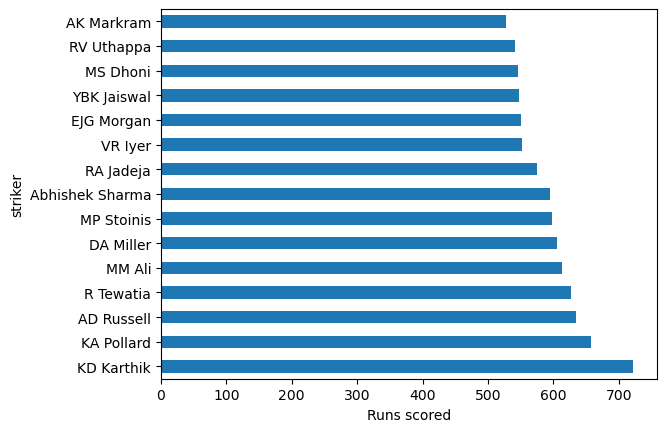

In [38]:
df3.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).plot(kind ='barh')
plt.xlabel('Runs scored')
plt.show()

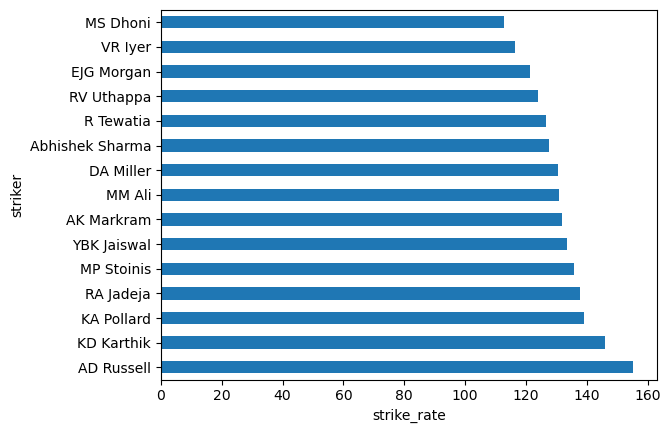

In [39]:
df3.groupby(['striker'])['strike_rate'].sum().sort_values(ascending = False).plot(kind ='barh')
plt.xlabel('strike_rate')
plt.show()

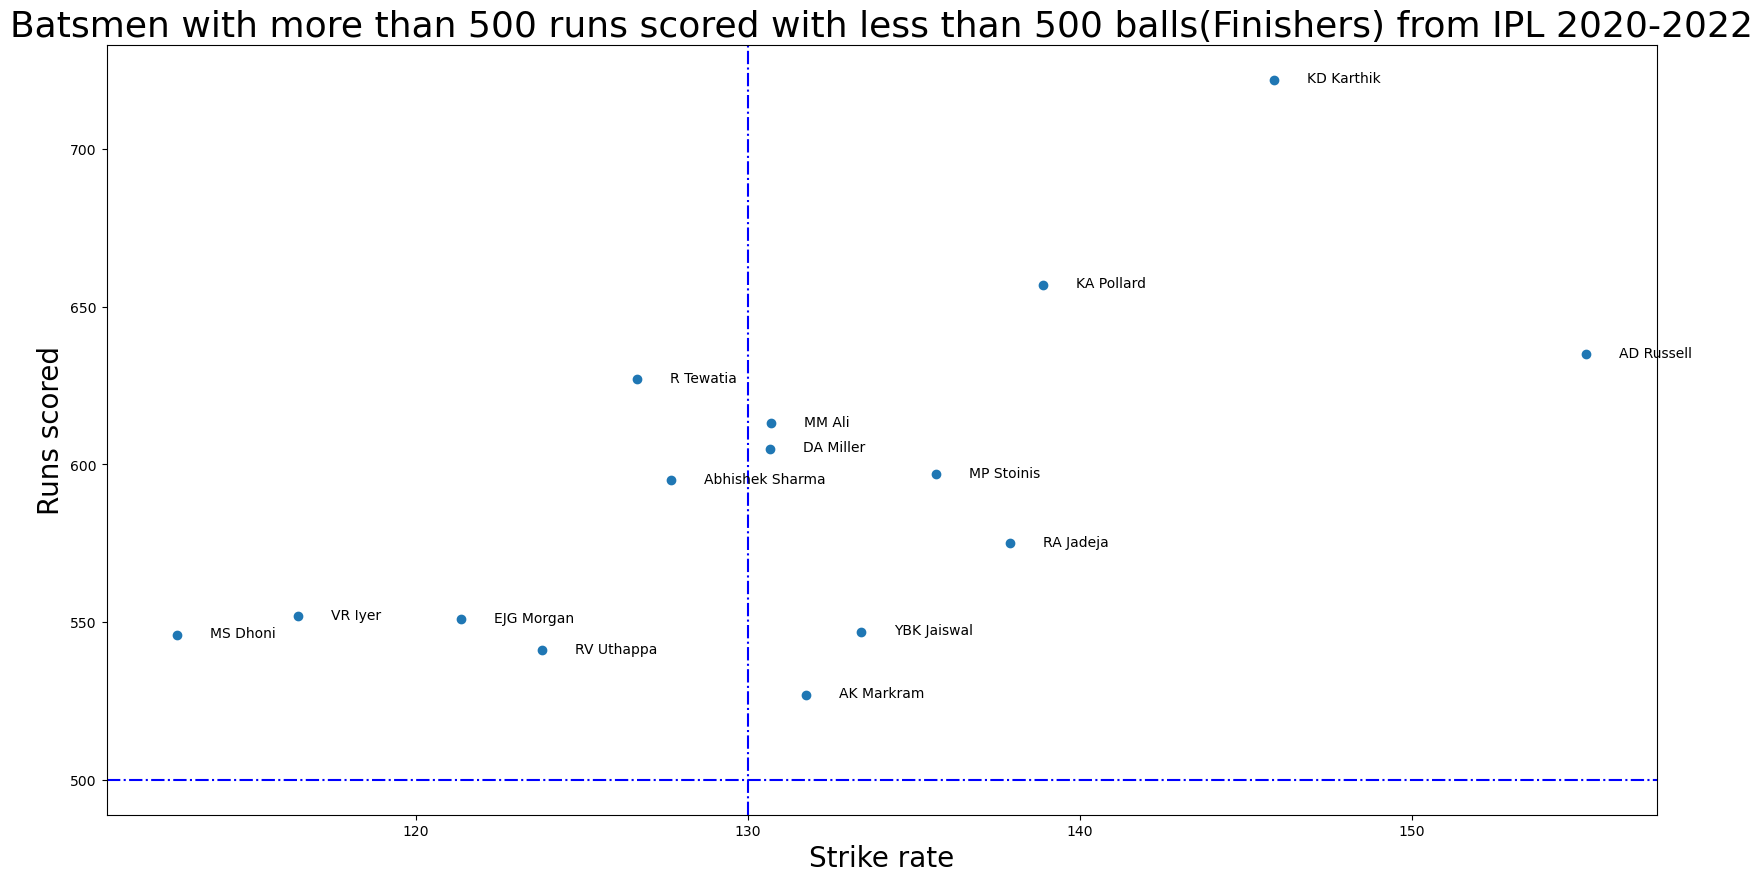

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(df3.strike_rate, df3.runs_off_bat)

for i in range(len(df3)):
     plt.text(df3['strike_rate'][i] + 1, df3['runs_off_bat'][i] - 1, df3['striker'][i] )
        
plt.title('Batsmen with more than 500 runs scored with less than 500 balls(Finishers) from IPL 2020-2022', fontsize=26 )
plt.xlabel('Strike rate', fontsize=20)
plt.ylabel('Runs scored', fontsize=20)
plt.axvline(130, ls='-.', color='blue')
plt.axhline(500, ls='-.', color='blue')
plt.show()

# Comparision between other finishers of TATA IPL 2023

In [ ]:
# Last ten innings scores of Dhoni in ipl 2023
# 1 Final vs Gujarat 0 (1)
# 2 Qualifier 1 vs Gujarat 1(2) 
# 3 Match 67 vs Delhi 5 (4)
# 4 Match 61 vs Kolkata 2 (3)
# 5 Match 55 vs Delhi 20 (9)
# 6 Match 49 vs Mumbai 2 (3)
# 7 Match 41 vs Punjab 13 (4)
# 8 Match 37 vs Rajasthan 0 (0) 
# 9 Match 33 vs Kolkata 2 (3) 
# 10 Match 29 vs Hyderabad 0 (0)

In [ ]:
# Last Five innings of Russell in ipl 2023
# 1 Match 68 vs Lucknow 7 (9)
# 2 Match 61 vs Chennai 2 (2)
# 3 Match 56 vs Rajasthan 10 (10)
# 4 Match 53 vs Punjab 42 (23)
# 5 Match 47 vs Hyderabad 24 (15)
# 6 Match 39 vs Gujarat 34 (19) 
# 7 Match 36 vs Bangalore 1 (2)
# 8 Match 33 vs Chennai 9 (6) 
# 9 Match 28 vs Delhi 38 (31) 
# 10 Match 22 vs Mumbai 21 (11)

In [ ]:
# Last five innings of Rinku in ipl 2023
# 1 Match 68 vs Lucknow 67 (33)
# 2 Match 61 vs Chennai 54 (43)
# 3 Match 56 vs Rajasthan 16 (18) 
# 4 Match 53 vs Punjab 21 (10) 
# 5 Match 47 vs Hyderabad 46 (35)
# 6 Match 39 vs Gujarat 19 (20) 
# 7 Match 36 vs Bangalore 18 (10)
# 8 Match 33 vs Chennai 53 (33) 
# 9 Match 28 vs Delhi 6 (8)
# 10 Match 22 vs Mumbai 18 (18)

In [53]:
import pandas as pd
dhoni = {'Runs':[0, 1, 5, 2, 20, 2, 13, 0, 2, 0],
         'Balls':[1, 2, 4, 3, 9, 3, 4, 0, 3, 0]}
df1 = pd.DataFrame(dhoni)
Russell = {'Runs': [7, 2, 10, 42, 24, 34, 1, 9, 38, 21],
         'Balls': [9, 2, 10, 23, 15, 19, 2, 6, 31, 11]}
df2 = pd.DataFrame(Russell)
Rinku = {'Runs':[67, 54, 16, 21, 46, 19, 18, 53, 6, 18],
         'balls': [33, 43, 18, 10, 35, 20, 10, 33, 8, 18]}
df3 = pd.DataFrame(Rinku)

In [55]:
# Dhoni
df1.head(10)

,Runs,Balls
0,0,1
1,1,2
2,5,4
3,2,3
4,20,9
5,2,3
6,13,4
7,0,0
8,2,3
9,0,0


In [56]:
# Russell
df2.head(10)

,Runs,Balls
0,7,9
1,2,2
2,10,10
3,42,23
4,24,15
5,34,19
6,1,2
7,9,6
8,38,31
9,21,11


In [57]:
# Rinku
df3.head(10)

,Runs,balls
0,67,33
1,54,43
2,16,18
3,21,10
4,46,35
5,19,20
6,18,10
7,53,33
8,6,8
9,18,18


In [58]:
print("Dhoni average runs:", df1['Runs'].mean())
print("Dhoni average balls:", df1['Balls'].mean())

print("Russell average runs:", df2['Runs'].mean())
print("Russell average balls:", df2['Balls'].mean())

print("Rinku average runs:", df3['Runs'].mean())
print("Rinku average balls:", df3['balls'].mean())

Dhoni average runs: 4.5
Dhoni average balls: 2.9
Russell average runs: 18.8
Russell average balls: 12.8
Rinku average runs: 31.8
Rinku average balls: 22.8


In [59]:
Avg = {'players':[dhoni, Russell, Rinku],
       'avg.runs':[4.5, 18.8, 31.8],
      'avg.balls':[2.9, 12.8, 22.8]}
df4= pd.DataFrame(Avg)
df4.head()

,players,avg.runs,avg.balls
0,"{'Runs': [0, 1, 5, 2, 20, 2, 13, 0, 2, 0], 'Balls': [1, 2, 4, 3, 9, 3, 4, 0, 3, 0]}",4.5,2.9
1,"{'Runs': [7, 2, 10, 42, 24, 34, 1, 9, 38, 21], 'Balls': [9, 2, 10, 23, 15, 19, 2, 6, 31, 11]}",18.8,12.8
2,"{'Runs': [67, 54, 16, 21, 46, 19, 18, 53, 6, 18], 'balls': [33, 43, 18, 10, 35, 20, 10, 33, 8, 18]}",31.8,22.8


### Conclusion:

<!-- ##### 1.The past three years of Ms Dhoni's data (IPL 2020-2022) shows that MSD can score some good amount of runs, but only with a below strike rate of 120 and this showing that he can survive by only scoring ball to ball runs. -->


<!-- ##### 2.When it comes to this years data (IPL 2023) of comparison with Russell and Rinku, it shows that he is not good enough to compete with them as a finisher. 
Despite Russell and Rinku's impressive performances in IPL 2023, Dhoni's invaluable leadership and strategic prowess 
continue to anchor his team. 
But he has the ability to play a finisher role even at this stage.
We have seen how hard he is going after the ball in 20th over and still maintains it consistently over
past 5 years. His age is not a factor. One thing I can conclude is that he can't play a finisher who can hit right 
from 16-20 overs but has the ability to finish the innings high.
 -->

<!-- ##### 3. So it can be concluded that MS Dhoni is not good enough as a batsman anymore.  -->
